# EE4211 Project - Question 1  Exploring the Data

Group number: Group No.21

Group members: Zhou Ying A0229575R,  Wang Shi Cheng A0206245M, Hing Kai Jie A0190155J,  Li Chunlin A0205460R

It will take about 5 mins to finish running.

And there will be some pre-experiments using singel data befor deriving the final results.
Please kindly read the annotations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import time,datetime
import seaborn as sns
from scipy.interpolate import interp1d

## Question 1.1 Detect  malfunctioning
1. How many houses are included in the measurement study? 

2. Are there any malfunctioning meters?

In [2]:
data = pd.read_csv("/Users/zhouying/Desktop/dataport-export_gas_oct2015-mar2016.csv")
df = pd.DataFrame(data)
# show the data and learn its structure preliminarily.
df

,localminute,dataid,meter_value
0,2015-10-01 00:00:10-05,739,88858
1,2015-10-01 00:00:13-05,8890,197164
2,2015-10-01 00:00:20-05,6910,179118
3,2015-10-01 00:00:22-05,3635,151318
4,2015-10-01 00:00:22-05,1507,390354
...,...,...,...
1584818,2016-03-31 23:59:14.336743-05,2129,201726
1584819,2016-03-31 23:59:17.427165-05,2945,161232
1584820,2016-03-31 23:59:35.370782-05,9729,138146
1584821,2016-03-31 23:59:47.816286-05,5129,166488


In [3]:
# grouped by different meter id.
grouped = df.groupby('dataid')
grouped.ngroups

157

#### There are 157 houses in this case.
#### Then, Are there any malfunctioning meters? If so, identify them and the time periods where they were malfunctioning. 
## There are two criterions to define a malfunctioning meter:
1. The data is decreasing

2. No records for a certain period

It is considered to be malfunctioning.


# For the first criterion.

In [4]:
meter_id = []
mal_id = []
for name,group in grouped:
    meter_id.append(name)
    d = np.diff(group.meter_value)
    defect_time = np.where(d < 0)[0]
    if len(defect_time):
        mal_id.append(name)
        defect_time = group.localminute.values[defect_time + 1]
        print('The decrease of gas meter No.', name, 'happened in :')
        print(defect_time, '\n')

The decrease of gas meter No. 35 happened in :
['2015-10-20 09:00:12-05'] 

The decrease of gas meter No. 77 happened in :
['2015-10-20 20:20:55-05'] 

The decrease of gas meter No. 94 happened in :
['2015-11-01 01:11:10-06' '2015-11-01 01:17:53-06'
 '2015-11-01 01:23:12-06' '2016-01-16 10:23:43.197562-06'
 '2016-01-18 11:19:47.220413-06' '2016-01-18 11:26:52.211985-06'] 

The decrease of gas meter No. 483 happened in :
['2015-10-21 00:18:54-05'] 

The decrease of gas meter No. 484 happened in :
['2015-11-01 01:18:29-06' '2015-11-01 01:34:43-06'
 '2015-11-01 01:40:00-06' '2015-11-01 01:44:34-06'
 '2015-11-01 01:48:31-06' '2015-11-01 01:55:28-06'
 '2016-03-05 00:01:58.770374-06' '2016-03-05 01:43:22.133007-06'
 '2016-03-05 01:57:57.625975-06'] 

The decrease of gas meter No. 1042 happened in :
['2015-10-07 14:32:08-05'] 

The decrease of gas meter No. 1086 happened in :
['2015-11-01 01:32:25-06'] 

The decrease of gas meter No. 1185 happened in :
['2015-10-17 10:51:09-05' '2015-10-17 11

In [6]:
print("The malfunctioning meters are:",mal_id,'\n')
print("So there are",len(mal_id),'malfunctioning meters.')

The malfunctioning meters are: [35, 77, 94, 483, 484, 1042, 1086, 1185, 1507, 1556, 1718, 1790, 1801, 2129, 2335, 2449, 3134, 3527, 3544, 3893, 4031, 4193, 4514, 4998, 5129, 5131, 5193, 5403, 5810, 5814, 5892, 6836, 7017, 7030, 7117, 7739, 7794, 7989, 8156, 8890, 9134, 9639, 9982] 

So there are 43 malfunctioning meters.


## Plot figure of malfunctiong meters'reading 

In [7]:
grouped.get_group(35) #show the value of No. 35 after grouping.

,localminute,dataid,meter_value
83,2015-10-01 00:14:44-05,35,93470
244,2015-10-01 00:42:34-05,35,93470
723,2015-10-01 02:02:37-05,35,93470
790,2015-10-01 02:12:38-05,35,93470
829,2015-10-01 02:20:36-05,35,93470
...,...,...,...
1584517,2016-03-31 22:45:59.300158-05,35,104690
1584556,2016-03-31 22:56:04.302527-05,35,104690
1584564,2016-03-31 22:58:02.799323-05,35,104690
1584584,2016-03-31 23:04:07.304107-05,35,104692


In [8]:
def get_figure(df,meter_id):
    group = df.get_group(meter_id)
    t = group.localminute.values
    t1 = pd.to_datetime(t)
    val = group.meter_value.values
    
    plt.figure(figsize=(15, 6))
    fig = plt.plot(t1,val)
    plt.xticks(rotation=-30)
    
    plt.title('Figure of Gas Meter No.' + str(meter_id))
    return fig

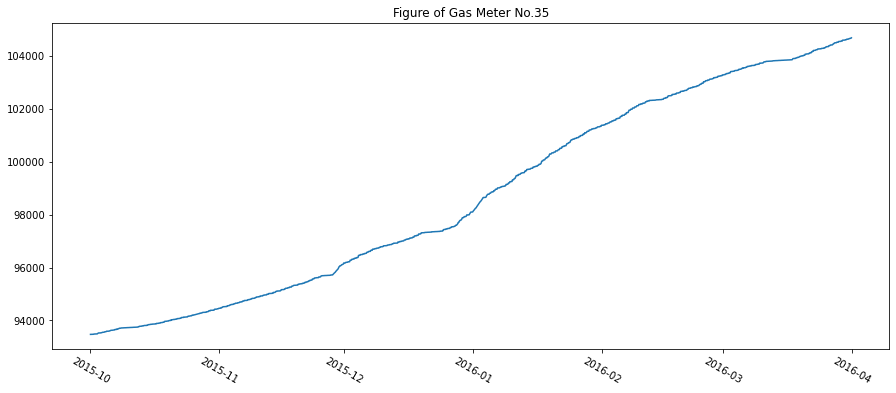

In [10]:
get_figure(grouped, 35) # you can change the meterid to see readings of the malfunctioning meters.

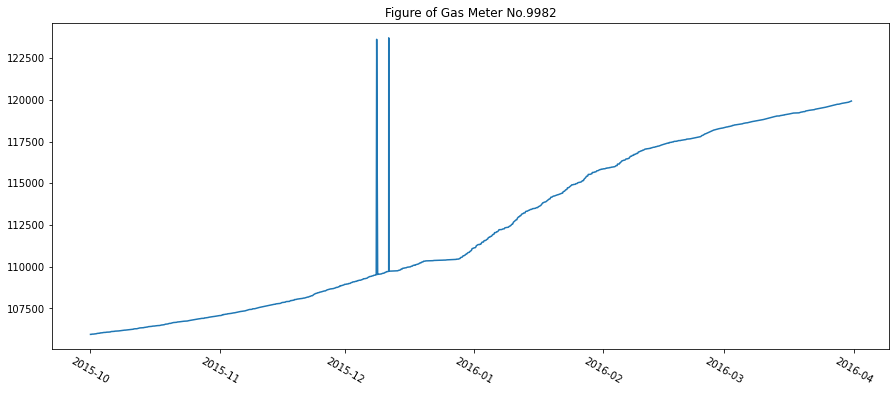

In [11]:
get_figure(grouped, 9982)

So we can see a very obvious difference for this meters  ( No.9982 ).

Then we extract more information from the meters that have sent decreasing value.

In [16]:
meter_id = []
mal_id = []
error = []
report_times = []
error_rate = []
for name,group in grouped:
    meter_id.append(name)
    d = np.diff(group.meter_value)
    defect_time = np.where(d < 0)[0]
    if len(defect_time):
        mal_id.append(name)
        report_times.append(len(group.meter_value))
        defect_time = group.localminute.values[defect_time + 1]
        error.append(len(defect_time))
        err = len(defect_time)/len(group.meter_value)*100
        error_rate.append(err)
        e_summary = pd.DataFrame({'dataid' : mal_id ,'report_times':report_times ,
                          'error_times' : error,'error_rate %' : error_rate})


In [17]:
e_summary

,dataid,report_times,error_times,error_rate %
0,35,11872,1,0.008423
1,77,10683,1,0.009361
2,94,36335,6,0.016513
3,483,27628,1,0.003620
4,484,44034,9,0.020439
5,1042,3830,1,0.026110
6,1086,30029,1,0.003330
7,1185,18456,135,0.731469
8,1507,32603,2,0.006134
9,1556,3690,12,0.325203


It seems that some meters malfunctioned just once or twice. But some meters went wrong much frequently.

# For the second condition. 

If the meters didn't report for a long time, we considered that the owner of the house left for a travel or moved, so it doesnt mean that the meters are malfunctioning.

So we didnt state them.

( But actually these data still need to be processed in Q1.3, cause it seems that some of them lost readings for such a long period that we cant get their hourly-readings per month. )

## Question 1.2  Hourly readings
#### Task: Select one month from the 6-month study interval and plot the hourly readings (time-series) for that month. 

Firstly, pre-process the time-series of the dataset.


In [18]:
#change to datetime format
df['localminute'] = df['localminute'].map(lambda x: str(x)[0:-3])
df['localminute'] = pd.to_datetime(df['localminute'], infer_datetime_format=True)

In [19]:
#get a dataframe of data by month:
month_list = []
grouped_bymonth = df.groupby(df.localminute.dt.month)
for name,group in grouped_bymonth:
    month_list.append(name)

In [20]:
# the data is recorded from 1 Oct 2015 to 31 Mar 2016 and after grouping, it it ordered.
month_list

[1, 2, 3, 10, 11, 12]

In [21]:
# get the list of meter id
grouped_id = []
grouped = df.groupby('dataid')
for name,group in grouped:
    grouped_id.append(name)

In [22]:
print("The meters are:",grouped_id)

The meters are: [35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


#### Since the reading is accumulatively, if there are no readings for a certain hour, we choose to use the previous reading.
#### We delete the malfunctioning meters selected in q1.1 bcause the readings is accumulated and we just use the final reading of an hour.

In [23]:
def select_monthdata(df, month, meter_id):
    df_month = df[df.localminute.dt.month.isin([month])]
    grouped = df_month.groupby('dataid')
    data1 = grouped.get_group(meter_id)
    hourly_value_list = []
    month_dict = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31} 
    #create a month dictionary and support that how many days in each month
    
    for d in np.arange(1, month_dict[month] + 1):
        #loop through each day in the list
        day_data = data1[data1.localminute.dt.day.isin ([d])]
        for h in range(0,24):
        #loop through each hour in the list
            hourly_data = day_data[day_data.localminute.dt.hour.isin ([h])]
            value = list(hourly_data.meter_value[-1:])
            hourly_value_list.append(value)
    hourly_data = pd.DataFrame(hourly_value_list,columns = ['values'])
    hourly_data = hourly_data.fillna(method = 'ffill')    #fill the vacant with the previous data.
    hourly_data = hourly_data.fillna(method = 'bfill')    #fill the vacant with its following data.
    return hourly_data

In [170]:
## select Oct data to describe
hourly_data = select_monthdata(df, 10, 35)
t = pd.date_range(start='2015-10-01 00:00:00',end = '2015-10-31 23:00:00' ,freq='H') # need to be changed with parameters changes
hourly_data.index = t

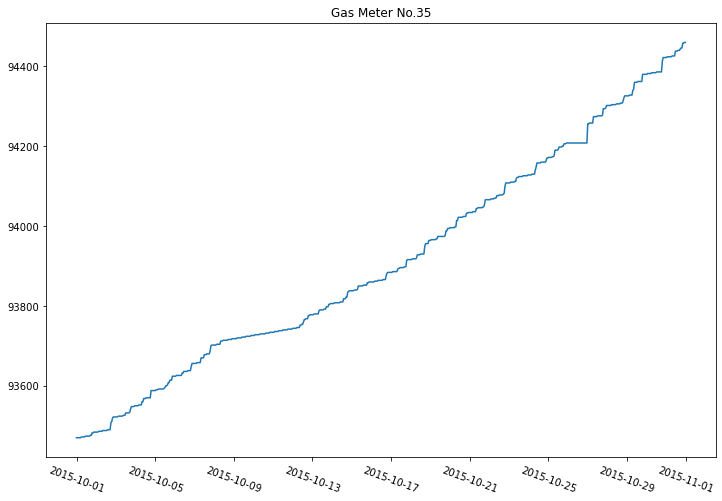

In [173]:
fig = plt.figure(figsize=(12,8))
axis1=fig.add_subplot(1,1,1)
plt.plot(hourly_data)
plt.xticks(rotation=-20)
plt.title('Gas Meter No.35')
plt.show()

### Question 1.3  Correlation Calculation


There will be some errors when runing through the whole meterid, that's because they dont have readings for a month long period, so then we select those meters out.

In [49]:
# select meters have no readings for at least a whole month 

grouped = df.groupby('dataid')
lack_id = []
for name,group in grouped:
    for i in month_list:
        t = group[group.localminute.dt.month == i]
        if not len(t):
            lack_id.append(name)
        lack_meter = np.unique(lack_id)
print('meters that report no readings for at least one month are: \n ',lack_meter)


meters that report no readings for at least one month are: 
  [1103 1403 2638 2645 2755 2814 2946 3036 4352 4421 4447 4671 4874 5317
 5545 5658 6101 6578 6673 6685 6863 7460 7566 7919 8244 8386 8467 8703
 9160 9474 9600 9620 9956]


In [54]:
re_id = []
for i in grouped_id:
    if i not in lack_meter:
        re_id.append(i)
print('meters to calculate Correlation: \n', re_id)

meters to calculate Correlation: 
 [35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1185, 1283, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2818, 2945, 2965, 2980, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4356, 4373, 4514, 4732, 4767, 4998, 5129, 5131, 5193, 5275, 5395, 5403, 5439, 5484, 5636, 5785, 5810, 5814, 5892, 5972, 6412, 6505, 6830, 6836, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7674, 7682, 7739, 7741, 7794, 7900, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8829, 8890, 8967, 9052, 9121, 9134, 9278, 9295, 9631, 9639, 9729, 9766, 9849, 9982]


In [55]:
# this part may need some time to run(about 5 mins)
hourly_data = pd.DataFrame()
for name in re_id:
    d_month = pd.DataFrame()
    month_list = [10,11,12,1,2,3]
    for month in month_list:
        d = select_monthdata(df, month, name)
        d_month = pd.concat([d_month,d],axis = 0)
    hourly_data = pd.concat([hourly_data,d_month], axis=1)
hourly_data.columns = re_id
#print(hourly_data)   

In [56]:
hourly_data #the correlation correlation of all meters

,35,44,77,94,114,187,222,252,370,483,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
0,93470.0,165674.0,58832.0,116642.0,128294.0,263272.0,612262.0,329214.0,87880.0,360456.0,...,193610.0,230534.0,115618.0,157556.0,108348.0,211656.0,122186.0,158512.0,33632.0,105946.0
1,93470.0,165674.0,58832.0,116644.0,128296.0,263272.0,612262.0,329214.0,87880.0,360456.0,...,193610.0,230534.0,115618.0,157556.0,108350.0,211658.0,122186.0,158512.0,33632.0,105946.0
2,93470.0,165674.0,58832.0,116644.0,128296.0,263272.0,612262.0,329216.0,87880.0,360456.0,...,193610.0,230536.0,115618.0,157556.0,108350.0,211658.0,122186.0,158512.0,33632.0,105946.0
3,93470.0,165674.0,58832.0,116644.0,128296.0,263272.0,612262.0,329216.0,87880.0,360456.0,...,193612.0,230536.0,115618.0,157558.0,108350.0,211658.0,122188.0,158512.0,33632.0,105946.0
4,93470.0,165674.0,58832.0,116644.0,128296.0,263272.0,612264.0,329216.0,87880.0,360456.0,...,193612.0,230536.0,115618.0,157558.0,108350.0,211658.0,122188.0,158512.0,33632.0,105946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,104682.0,175070.0,64646.0,140358.0,145298.0,285492.0,677486.0,351332.0,100794.0,383226.0,...,218802.0,270024.0,130688.0,183644.0,124478.0,255418.0,138144.0,179900.0,39292.0,119924.0
740,104682.0,175070.0,64652.0,140358.0,145298.0,285492.0,677486.0,351332.0,100794.0,383230.0,...,218802.0,270026.0,130708.0,183644.0,124478.0,255418.0,138144.0,179902.0,39292.0,119924.0
741,104684.0,175070.0,64652.0,140358.0,145298.0,285492.0,677486.0,351334.0,100816.0,383230.0,...,218802.0,270026.0,130714.0,183664.0,124488.0,255418.0,138144.0,179902.0,39292.0,119924.0
742,104690.0,175070.0,64652.0,140358.0,145298.0,285492.0,677486.0,351334.0,100816.0,383230.0,...,218802.0,270026.0,130714.0,183664.0,124488.0,255418.0,138146.0,179902.0,39292.0,119924.0


<AxesSubplot:>

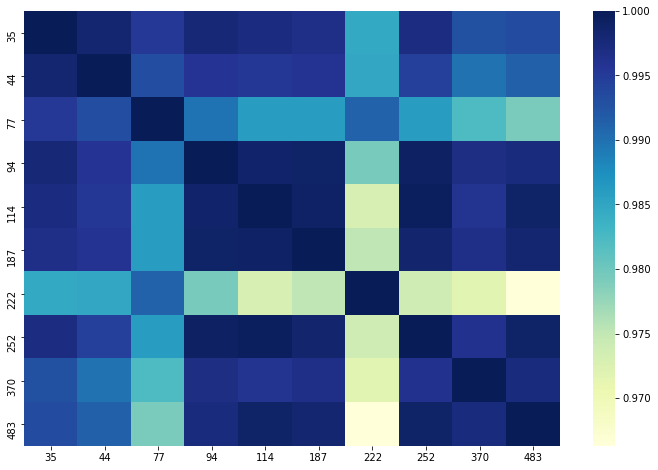

In [67]:
##### use pandas 'corr' command to Calculate Correlation######
# try first ten columns
hourly_corr1 = hourly_data.iloc[:,:10].corr()
#use seaborn to visualize
fig = plt.subplots(figsize=(12,8))
sns.heatmap(hourly_corr1, cmap='YlGnBu')

<AxesSubplot:>

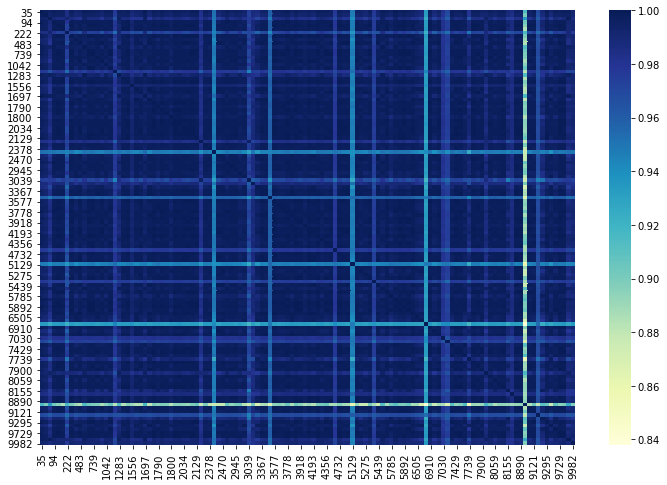

In [68]:
##### use pandas 'corr' command to Calculate Correlation######

# get rekevant data
hourly_corr = hourly_data.corr()
#use seaborn to visualize
fig = plt.subplots(figsize=(12,8))
sns.heatmap(hourly_corr, cmap='YlGnBu')

In [69]:
hourly_corr

,35,44,77,94,114,187,222,252,370,483,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
35,1.000000,0.998161,0.995343,0.997859,0.997221,0.996605,0.984682,0.997002,0.992850,0.993526,...,0.998527,0.969209,0.990915,0.998353,0.991148,0.997194,0.996620,0.997925,0.997596,0.992779
44,0.998161,1.000000,0.993267,0.995737,0.995523,0.995799,0.984977,0.994579,0.989871,0.991413,...,0.996656,0.967454,0.987877,0.996255,0.989090,0.995242,0.994399,0.996159,0.996044,0.991333
77,0.995343,0.993267,1.000000,0.989736,0.986141,0.986163,0.991271,0.986090,0.982319,0.979284,...,0.989648,0.960576,0.980665,0.989776,0.976869,0.988158,0.985122,0.988714,0.999234,0.986668
94,0.997859,0.995737,0.989736,1.000000,0.998665,0.998877,0.979339,0.999120,0.996890,0.997467,...,0.998945,0.969935,0.991346,0.998947,0.995153,0.997845,0.998791,0.999356,0.992772,0.992260
114,0.997221,0.995523,0.986141,0.998665,1.000000,0.998987,0.972977,0.999556,0.996022,0.998866,...,0.999500,0.969118,0.992948,0.999280,0.997008,0.998143,0.999570,0.999263,0.990220,0.991484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,0.997194,0.995242,0.988158,0.997845,0.998143,0.996606,0.975597,0.998634,0.991208,0.995579,...,0.999134,0.970635,0.996920,0.999182,0.991158,1.000000,0.996990,0.997103,0.991897,0.989342
9729,0.996620,0.994399,0.985122,0.998791,0.999570,0.998919,0.973200,0.999547,0.997705,0.999398,...,0.998791,0.969087,0.990504,0.998448,0.997909,0.996990,1.000000,0.999484,0.989057,0.991854
9766,0.997925,0.996159,0.988714,0.999356,0.999263,0.999297,0.977383,0.999153,0.997255,0.998241,...,0.998956,0.969893,0.989736,0.998717,0.996685,0.997103,0.999484,1.000000,0.992096,0.993066
9849,0.997596,0.996044,0.999234,0.992772,0.990220,0.990260,0.989457,0.990007,0.985373,0.984122,...,0.993230,0.963645,0.984770,0.993168,0.981403,0.991897,0.989057,0.992096,1.000000,0.989035


In [70]:
order = np.argsort(hourly_corr.iloc[0]) # try house No.35 first
index = np.flip(order)[1:6]
corr_id = []
for id in index:
    corr_id.append(re_id[id])
corr_id

[5810, 1697, 7287, 7682, 5484]

The top 5 relative families of consumer No. 35 are: [5810, 1697, 7287, 7682, 5484]

In [71]:
for i in range(len(re_id)):
    order = np.argsort(hourly_corr.iloc[i].values)
    index = np.flip(order)[1:6]
    corr_id = []
    for id in index:
        corr_id.append(re_id[id])
    print('The top 5 relative families of consumer No.', re_id[i], 'are:\t', corr_id)

The top 5 relative families of consumer No. 35 are:	 [5810, 1697, 7287, 7682, 5484]
The top 5 relative families of consumer No. 44 are:	 [35, 5810, 1697, 7287, 7682]
The top 5 relative families of consumer No. 77 are:	 [9849, 1697, 1283, 35, 484]
The top 5 relative families of consumer No. 94 are:	 [3778, 5892, 2575, 1507, 6910]
The top 5 relative families of consumer No. 114 are:	 [2094, 4228, 4031, 3893, 1718]
The top 5 relative families of consumer No. 187 are:	 [5636, 1415, 7741, 5892, 1507]
The top 5 relative families of consumer No. 222 are:	 [77, 1283, 9849, 7965, 1697]
The top 5 relative families of consumer No. 252 are:	 [4732, 661, 5395, 5814, 3893]
The top 5 relative families of consumer No. 370 are:	 [744, 1589, 3527, 7900, 6505]
The top 5 relative families of consumer No. 483 are:	 [3367, 4193, 5439, 8829, 6412]
The top 5 relative families of consumer No. 484 are:	 [5484, 1697, 2575, 4296, 5810]
The top 5 relative families of consumer No. 661 are:	 [5814, 3893, 252, 739, 4

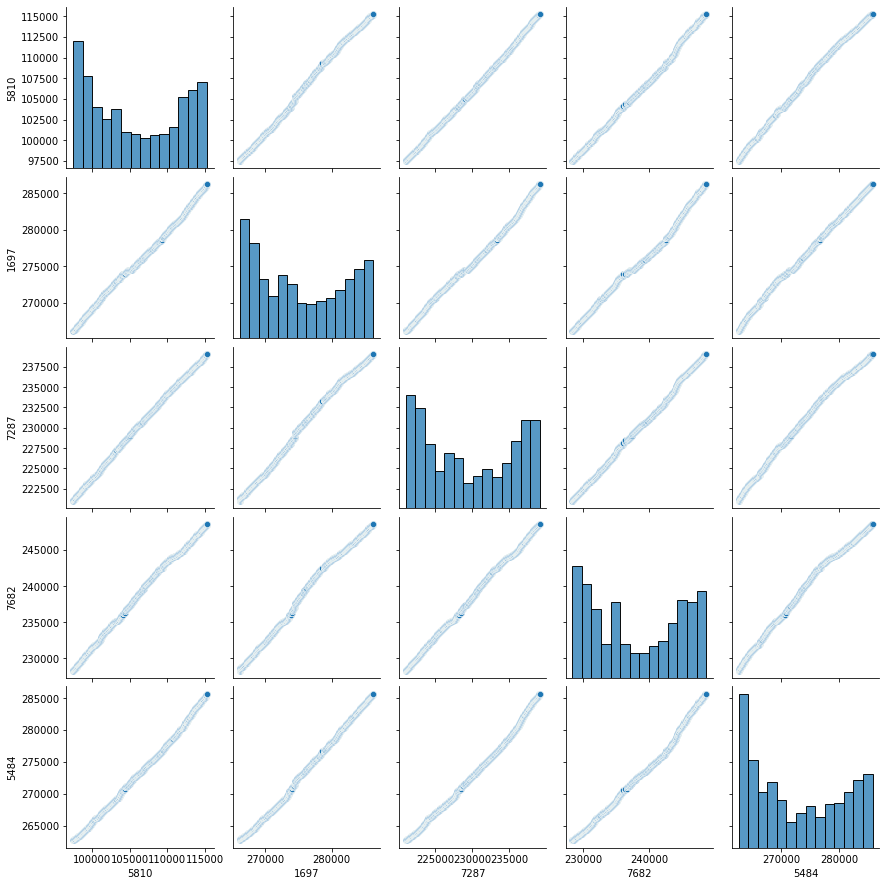

In [72]:
# show the scatter figure between No.35 and its high correlation meters
df_corrfig = pd.DataFrame()
for i in [5810, 1697, 7287, 7682, 5484]:
    df_corrfig = pd.concat([df_corrfig,hourly_data[i]], axis = 1) 
    
sns.pairplot(df_corrfig) 